# Reprogramming dataset (dynamic barcoding)

The reprogramming dataset from *Biddy, B. A. et al. Nature 564, 219–224 (2018)*. This dataset has multiple time points for both the clones and the state measurements. 

The cells are barcoded over 3 rounds during the entire differentiation process. We treat
barcode tags from each round as independent clonal label here. In this representation, 
each cell can have multiple clonal labels at different time points.

**Key components**:

* Part I: Infer transition map using clones from all time points

* Part II: Infer transition map using clones from the last time point

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity = 3
cs.settings.set_figure_params(
    format="png", dpi=75, fontsize=14
)  # use png to reduce file size.

Running cospar 0.0.7 (python 3.6.12) on 2021-02-09 17:53.


## Loading data

In [3]:
adata_orig = cs.datasets.reprogramming_dynamic_BC()

  0%|          | 0.00/149M [00:00<?, ?B/s]

try downloading from url
https://kleintools.hms.harvard.edu/tools/downloads/cospar/CellTagging_NoConcat_adata_preprocessed.h5ad
... this may take a while but only happens once


100%|██████████| 149M/149M [00:02<00:00, 54.6MB/s] 


In [4]:
adata_orig

AnnData object with n_obs × n_vars = 18803 × 28001
    obs: 'time_info', 'state_info'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

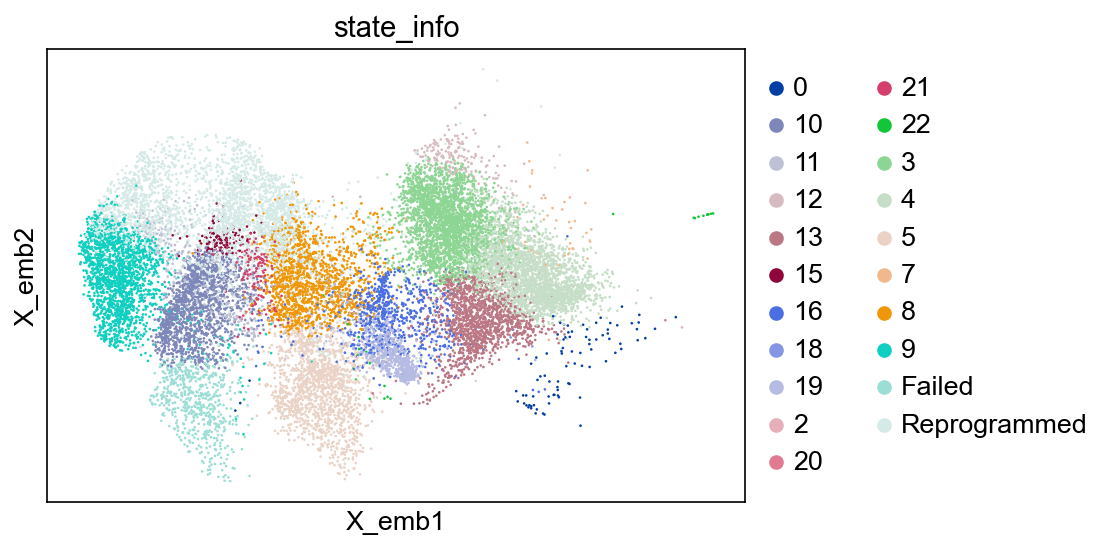

In [5]:
cs.pl.embedding(adata_orig, color="state_info")

In [6]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Availabel clusters: ['2', '19', '4', '9', '21', '22', 'Reprogrammed', '8', '20', '15', '18', '7', 'Failed', '3', '16', '0', '13', '12', '5', '11', '10']
Availabel time points: ['3', '4', '6', '5', '7', '8']
Clonal time points: ['3', '4', '6', '5', '7', '8']


## Raw clonal data analysis

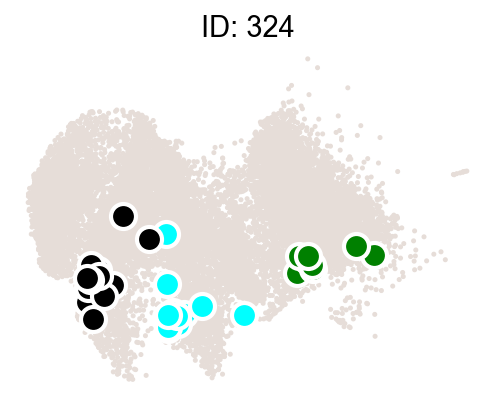

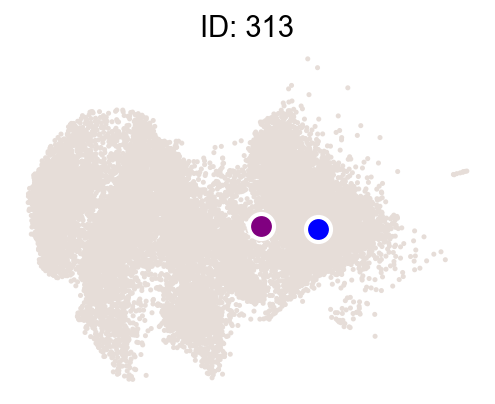

In [7]:
# cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1],color_list=['black','red','blue'],point_size=2)

cs.pl.clones_on_manifold(
    adata_orig, selected_clone_list=[324, 313], point_size=2
)  # 324,313,446,716,367

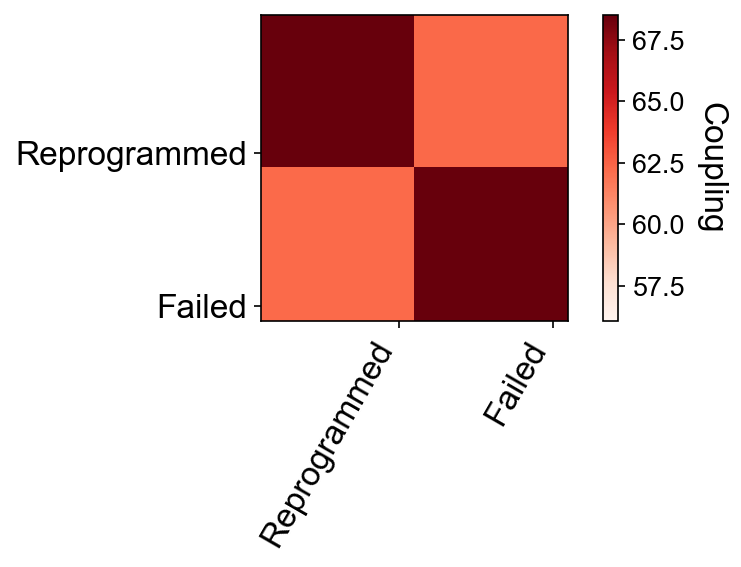

In [8]:
selected_time_point = "8"
selected_fates = ["Reprogrammed", "Failed"]
cs.pl.fate_coupling_from_clones(
    adata_orig, selected_time_point, selected_fates=selected_fates, color_bar=True
)

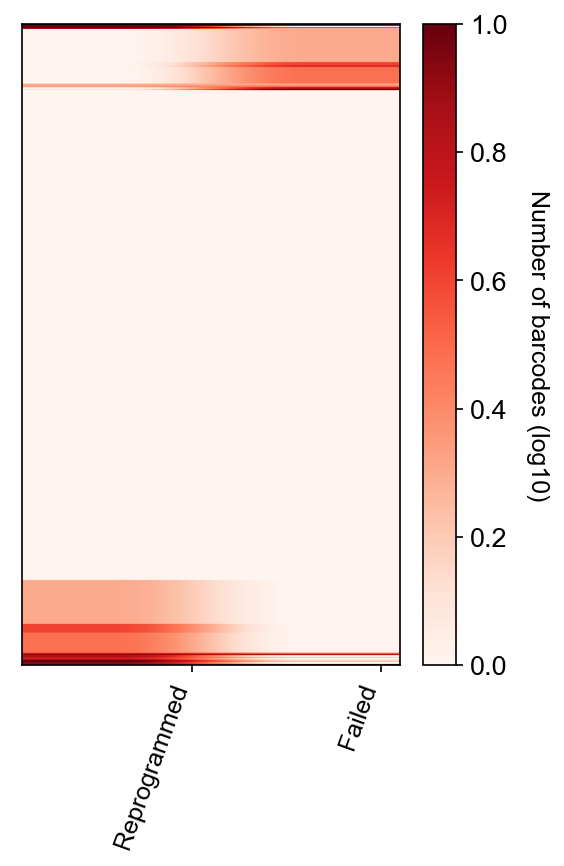

In [9]:
selected_time_point = "8"
cs.pl.barcode_heatmap(
    adata_orig, selected_time_point, selected_fates=selected_fates, color_bar=True
)

The computation requires simulation, with time linearly proportional to N_resampling, and the number of clones. Can take hours for big data. 

Current clone id: 0
Current clone id: 50
Current clone id: 100
Current clone id: 150
Current clone id: 200
Current clone id: 250
Current clone id: 300
Current clone id: 350
Current clone id: 400
Current clone id: 450
Current clone id: 500
Current clone id: 550
Current clone id: 600
Current clone id: 650
Current clone id: 700
Current clone id: 750
Current clone id: 800
Current clone id: 850
Current clone id: 900
Current clone id: 950
Current clone id: 1000
Current clone id: 1050
Current clone id: 1100
Current clone id: 1150
Current clone id: 1200
Current clone id: 1250
Current clone id: 1300
Current clone id: 1350
Current clone id: 1400
Current clone id: 1450
Current clone id: 1500
Current clone id: 1550
Current clone id: 1600
Current clone id: 1650


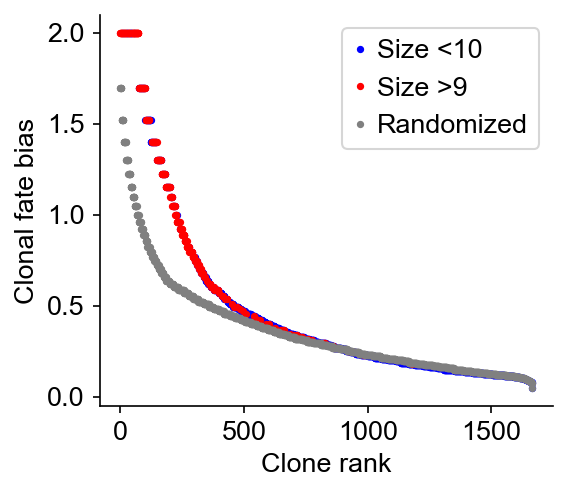

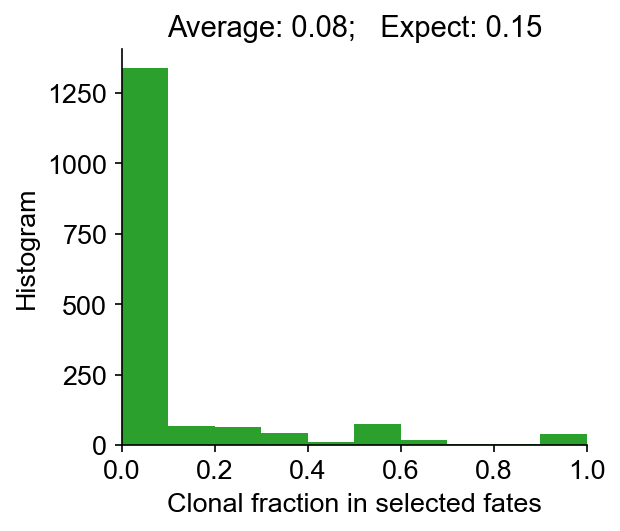

In [10]:
clonal_fate_bias, clone_id = cs.pl.clonal_fate_bias(
    adata_orig,
    selected_fate="Reprogrammed",
    clone_size_thresh=10,
    N_resampling=100,
    compute_new=False,
)

## Part I: Infer transition map using clones from all time points

### Map inference

Running it the first time takes 20 mins, 17 mins of which are used to compute the similarity matrix. When it is run again, it only takes 3 mins.

-------Step 1: Select time points---------
--> Clonal cell fraction (day 3-4): 0.5632183908045977
--> Clonal cell fraction (day 4-5): 0.8427464008859358
--> Clonal cell fraction (day 5-6): 0.8514851485148515
--> Clonal cell fraction (day 6-7): 0.8354622871046229
--> Clonal cell fraction (day 7-8): 0.854301948051948
--> Clonal cell fraction (day 4-3): 0.12181616832779624
--> Clonal cell fraction (day 5-4): 0.7069306930693069
--> Clonal cell fraction (day 6-5): 0.9105839416058394
--> Clonal cell fraction (day 7-6): 0.890625
--> Clonal cell fraction (day 8-7): 0.9279731993299832
--> Numer of cells that are clonally related -- day 3: 49  and day 4: 110
--> Numer of cells that are clonally related -- day 4: 761  and day 5: 2142
--> Numer of cells that are clonally related -- day 5: 2580  and day 6: 2994
--> Numer of cells that are clonally related -- day 6: 2747  and day 7: 4389
--> Numer of cells that are clonally related -- day 7: 4210  and day 8: 6094
Valid clone number 'FOR' post select

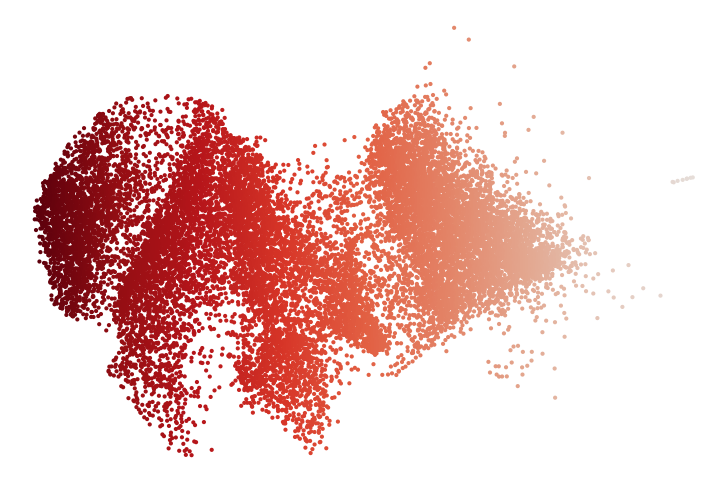

In [11]:
noise_threshold = 0.2  #
selected_clonal_time_points = ["3", "4", "5", "6", "7", "8"]
# selected_clonal_time_points=['7','8']
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata_orig,
    selected_clonal_time_points,
    smooth_array=[15, 10, 5],
    noise_threshold=noise_threshold,
    demulti_threshold=noise_threshold,
    use_full_Smatrix=True,
)

## Save or load pre-computed data

This can be used to save adata with maps computed from different tools or parameters.
Usually, different parameter choices will result in different `data_des`, a prefix to identify the anndata.
Saving an adata would print the `data_des`, which can be used to load the corresponding adata.

In [12]:
## Save or load pre-computed data

This can be used to save adata with maps computed from different tools or parameters.
Usually, different parameter choices will result in different `data_des`, a prefix to identify the anndata.
Saving an adata would print the `data_des`, which can be used to load the corresponding adata.save_data=True
if save_data:
    cs.hf.save_map(adata)
    
load_data=False
if load_data:
    ## Updated Jan 28, 2021
    #data_des='CellTagging_NoConcat_TwoTimeClone_t*3*4*5*6*7*8'
    data_des='CellTagging_NoConcat_OneTimeClone_t*3*4*5*6*7*8'
    adata=cs.hf.load_saved_adata_with_key(data_des)


Saved file: data_des='CellTagging_NoConcat_MultiTimeClone_0_t*3*4*5*6*7*8'


In [13]:
cs.hf.check_available_choices(adata)

Available transition maps: ['transition_map', 'intraclone_transition_map']
Availabel clusters: ['2', '19', '4', '9', '21', '22', 'Reprogrammed', '8', '20', '15', '18', '7', 'Failed', '3', '16', '0', '13', '12', '5', '11', '10']
Availabel time points: ['3', '4', '6', '5', '7', '8']
Clonal time points: ['3', '4', '6', '5', '7', '8']


### Plotting

There are some common parameters:

* `used_map_name` (str). It determines which transition map to use for analysis. Choices: {‘transition_map’, ‘intraclone_transition_map’, ‘OT_transition_map’, ‘HighVar_transition_map’,’clonal_transition_map’}

* `selected_fates` (list of str). Selected clusters to aggregate differentiation dynamics and visualize fate bias etc.. It allows nested structure, e.g., selected_fates=[‘a’, [‘b’, ‘c’]] selects two clusters: cluster ‘a’ and the other that combines ‘b’ and ‘c’.

* `map_backwards` (bool). We can analyze either the forward transitions, i.e., where the selected states or clusters are going (map_backwards=False), or the backward transitions, i.e., where these selected states or clusters came from (map_backwards=True). The latter is more useful, and is the default.

* `selected_time_points` (list). List of time points to use. By default, all are used. 

#### Transition profiles for single cells

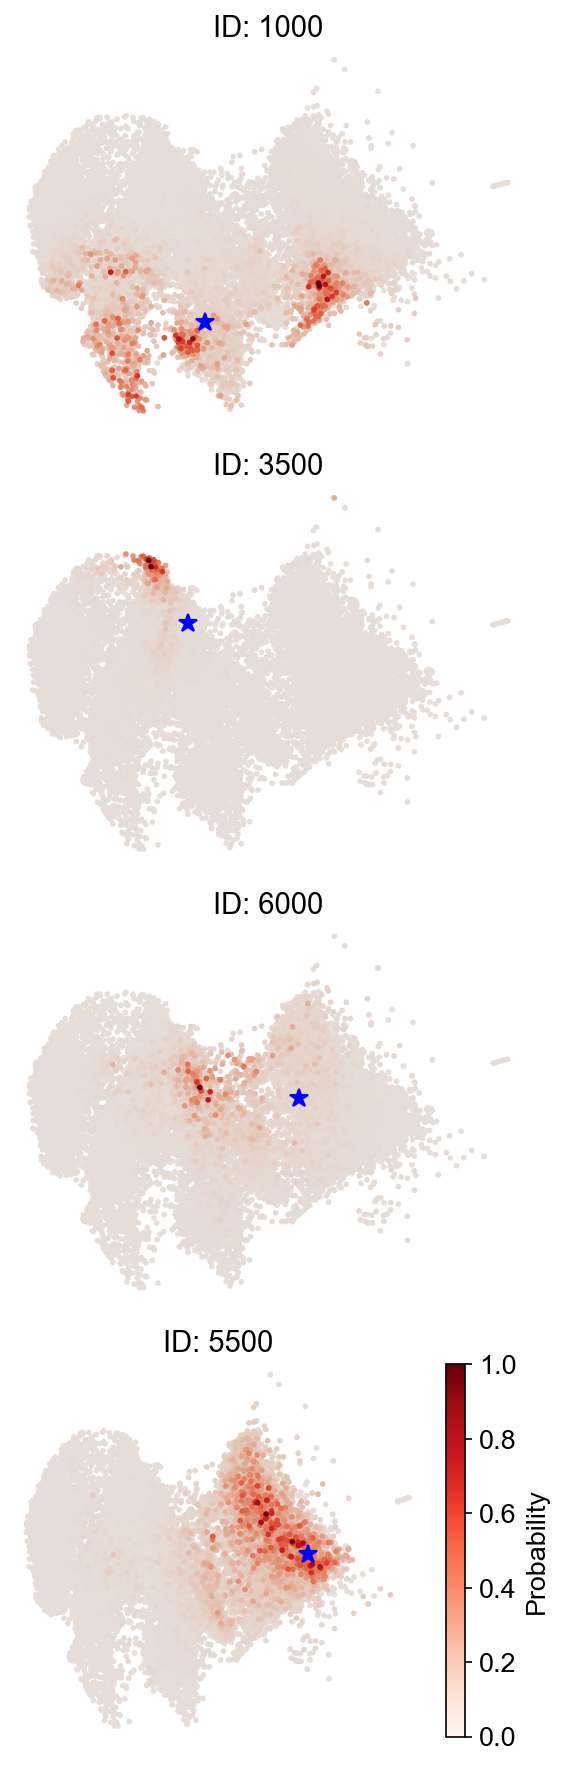

In [14]:
selected_state_id_list = [1000, 3500, 6000, 5500]

cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    used_map_name="transition_map",
    map_backwards=False,
)

#### Fate map

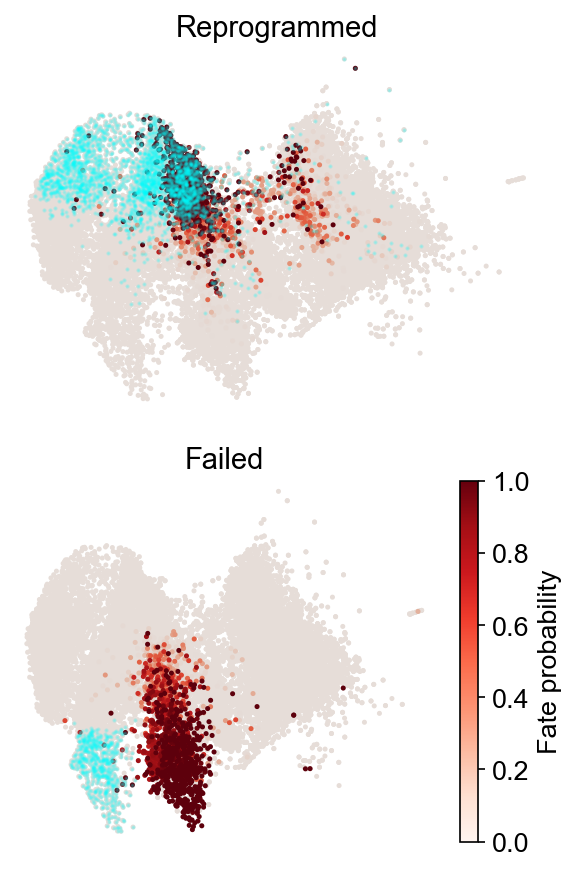

In [15]:
cs.pl.fate_map(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="intraclone_transition_map",
    map_backwards=True,
    plot_target_state=True,
)

#### Relative fate bias

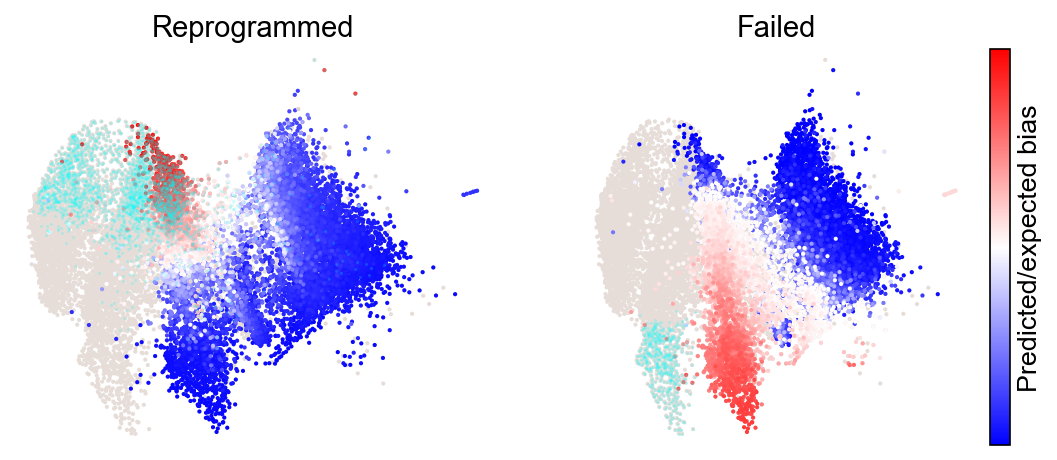

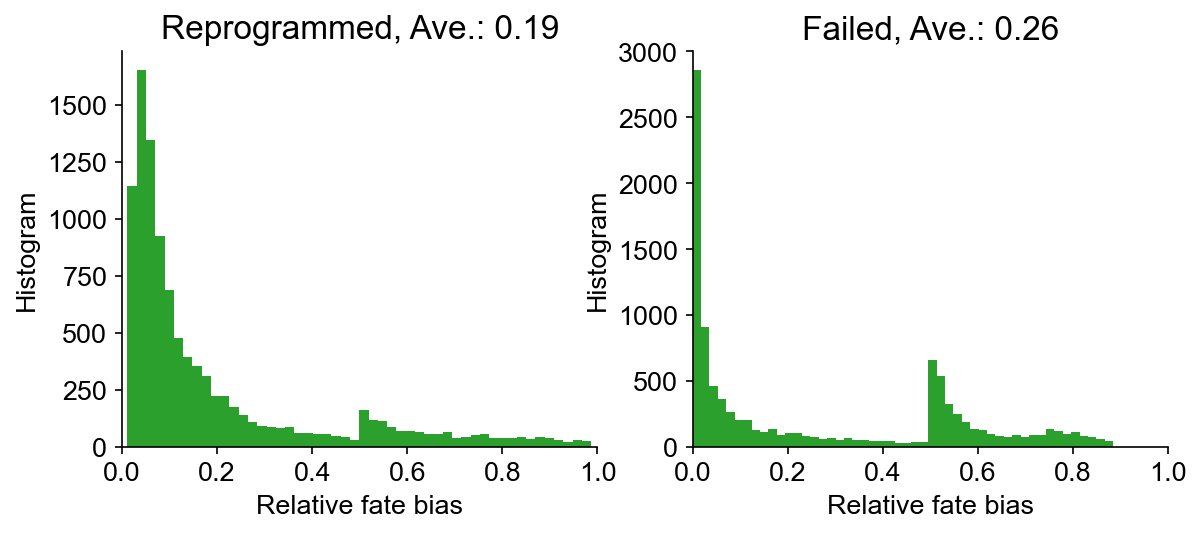

In [16]:
cs.pl.fate_bias_intrinsic(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="transition_map",
    selected_time_points=[],
    plot_target_state=True,
    map_backwards=True,
)

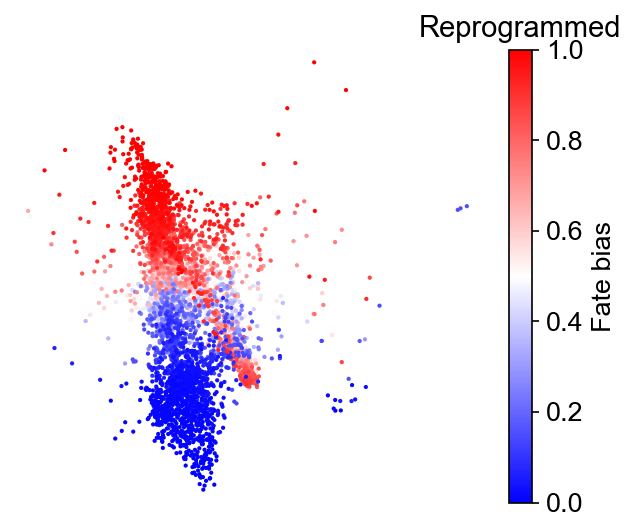

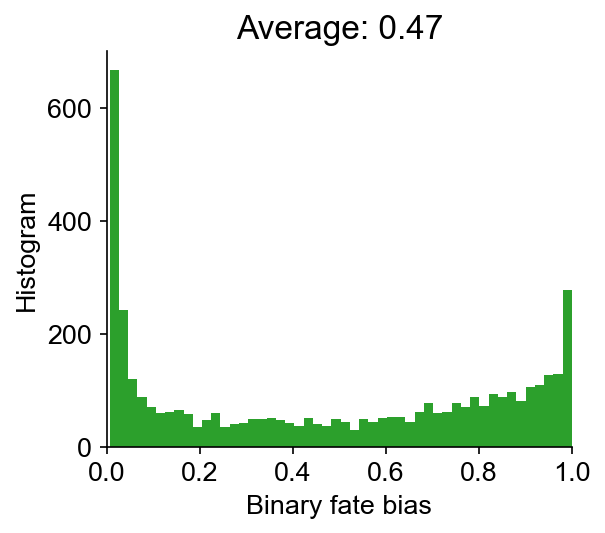

In [17]:
cs.pl.fate_bias_from_binary_competition(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="transition_map",
    selected_time_points=["7"],
    plot_target_state=False,
    map_backwards=True,
    sum_fate_prob_thresh=0,
)

#### Identify differentially expressed genes

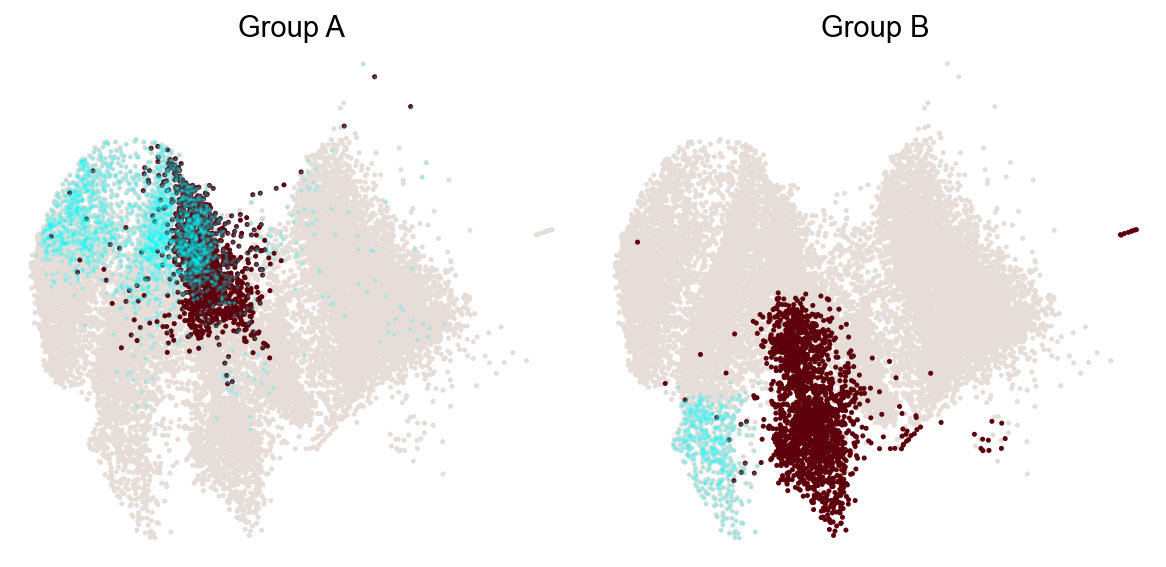

In [18]:
cs.pl.dynamic_trajectory_from_competition_bias(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="transition_map",
    map_backwards=True,
    selected_time_points=[],
    bias_threshold=0,
    sum_fate_prob_thresh=0.2,
    avoid_target_states=False,
)

#### Map trajectory backwards iteratively

From our experience, it is better to use the intra-clone transition map to compute the trajectory 

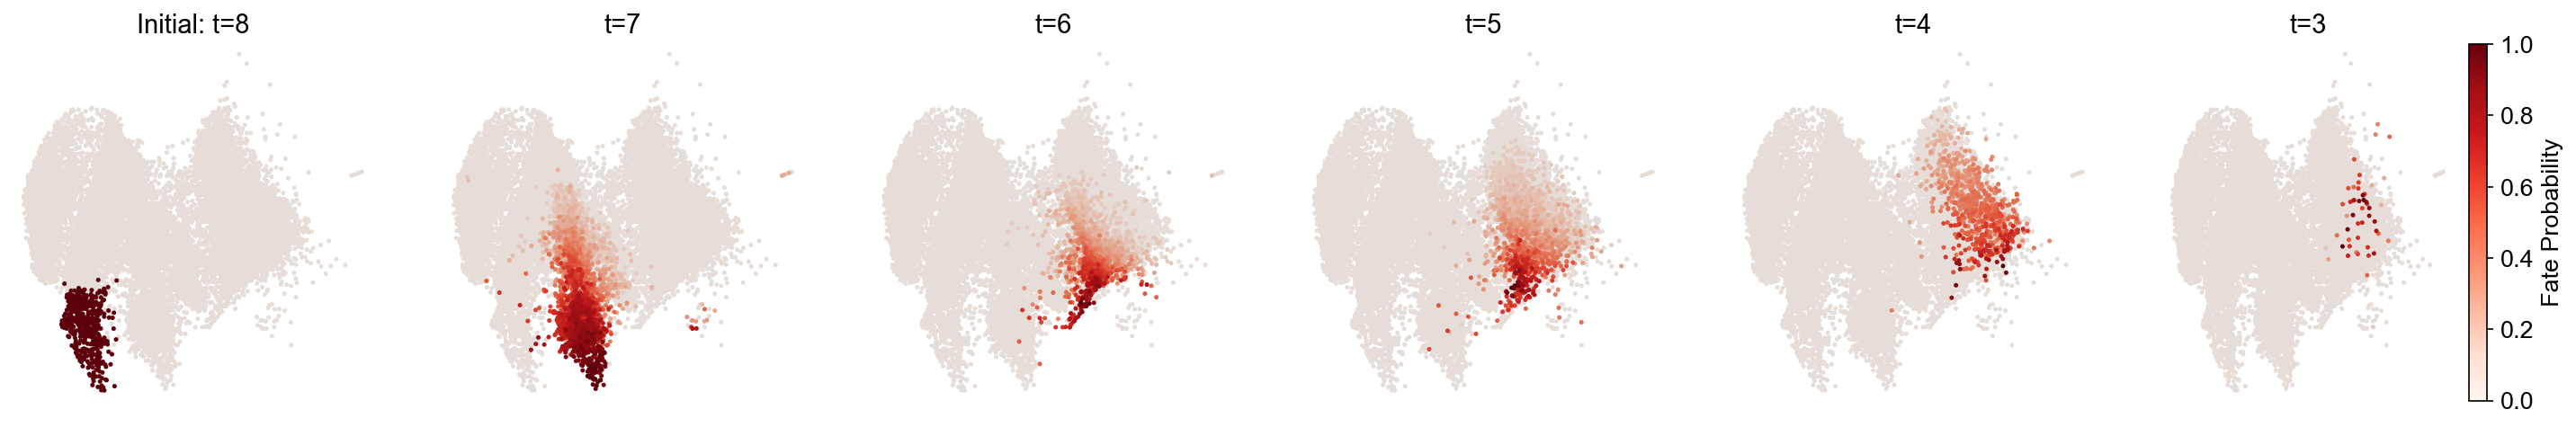

In [19]:
# plot each tiem point separately, use the transition map.

cs.pl.dynamic_trajectory_via_iterative_mapping(
    adata,
    selected_fate="Failed",
    used_map_name="transition_map",
    map_backwards=True,
    map_threshold=0.1,
    plot_separately=True,
    apply_time_constaint=True,
    point_size=2,
)

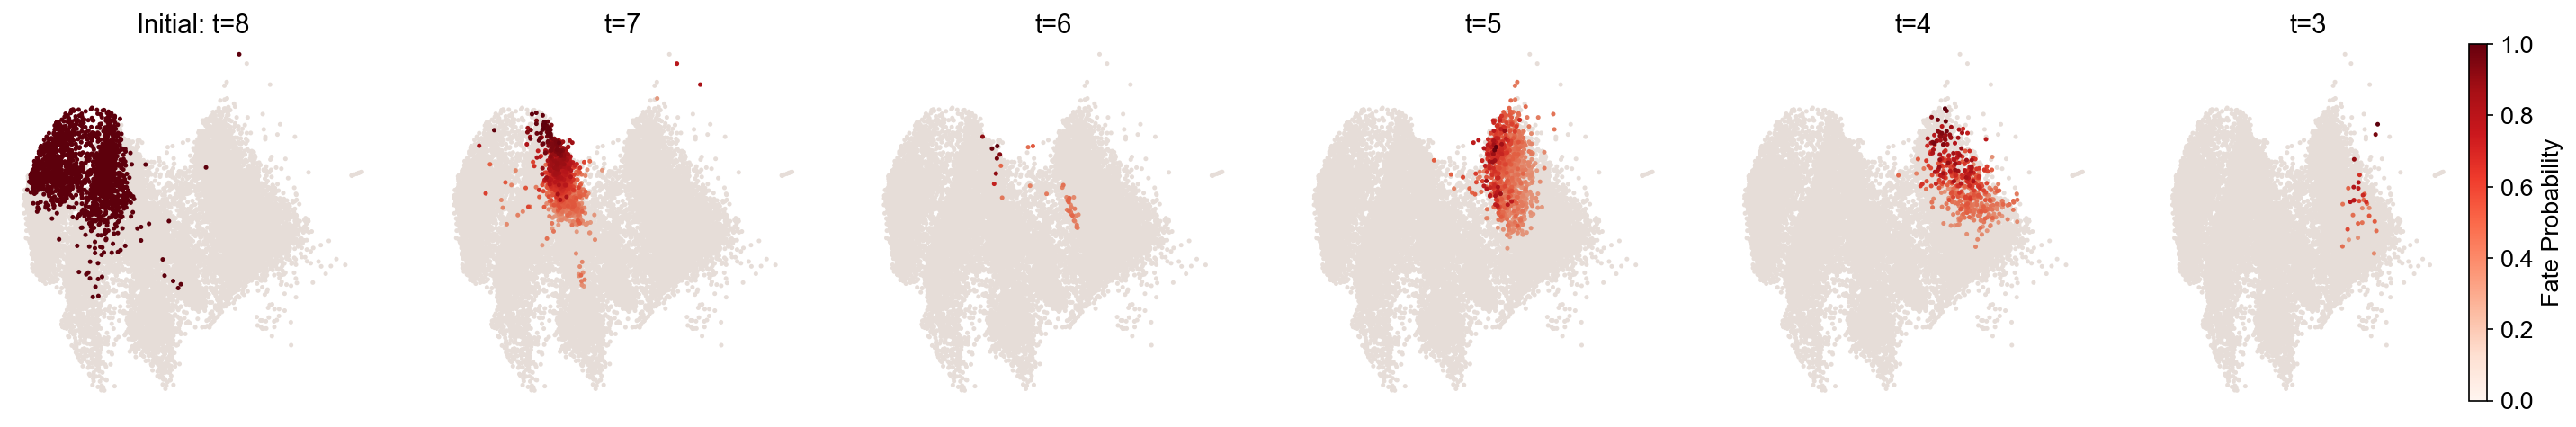

In [20]:
# plot each tiem point separately, use the transition map.

cs.pl.dynamic_trajectory_via_iterative_mapping(
    adata,
    selected_fate="Reprogrammed",
    used_map_name="transition_map",
    map_backwards=True,
    map_threshold=0.3,
    plot_separately=True,
    apply_time_constaint=True,
    point_size=2,
)

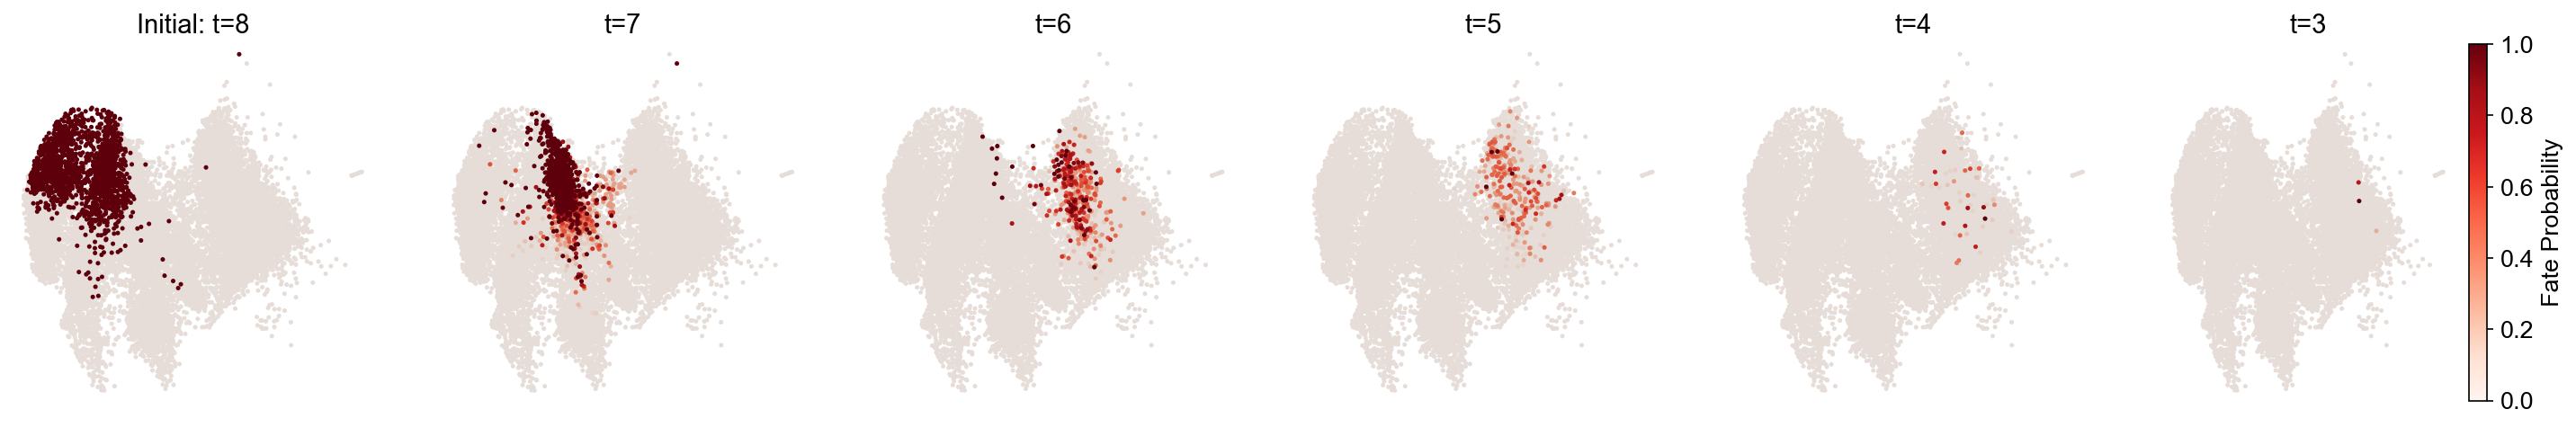

In [21]:
# plot each tiem point separately, use the intra-clone transition map.
cs.pl.dynamic_trajectory_via_iterative_mapping(
    adata,
    selected_fate="Reprogrammed",
    used_map_name="intraclone_transition_map",
    map_backwards=True,
    map_threshold=0.05,
    plot_separately=True,
    apply_time_constaint=True,
    point_size=2,
)

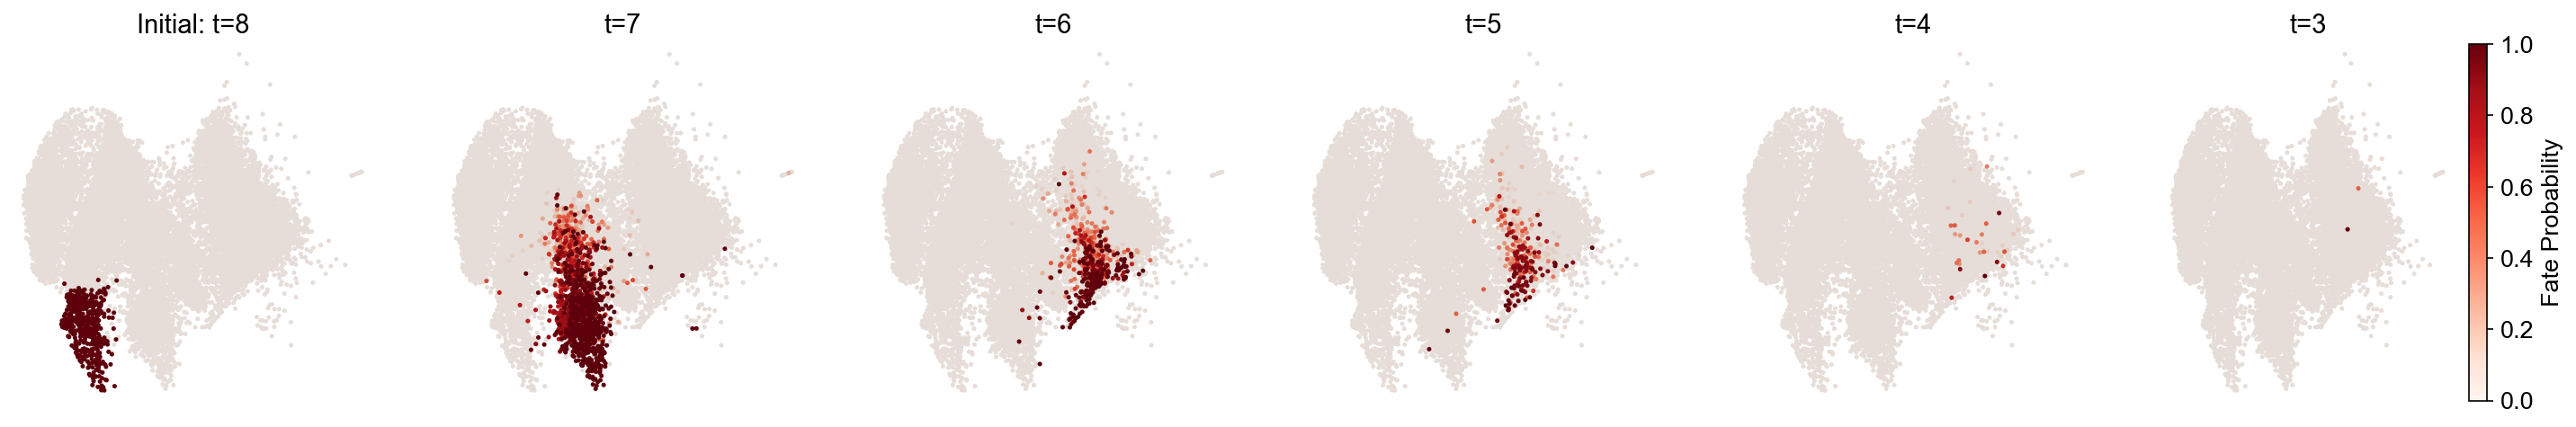

In [22]:
# plot each tiem point separately, use the intra-clone transition map.
cs.pl.dynamic_trajectory_via_iterative_mapping(
    adata,
    selected_fate="Failed",
    used_map_name="intraclone_transition_map",
    map_backwards=True,
    map_threshold=0.05,
    plot_separately=True,
    apply_time_constaint=True,
    point_size=2,
)

#### Gene trend along the trajectory

The results are based on pre-computed dynamic trajectories from the preceding step. It is
better to use the `intraclone_transition_map`. First, show the expression dynamics along the failed trajectory:

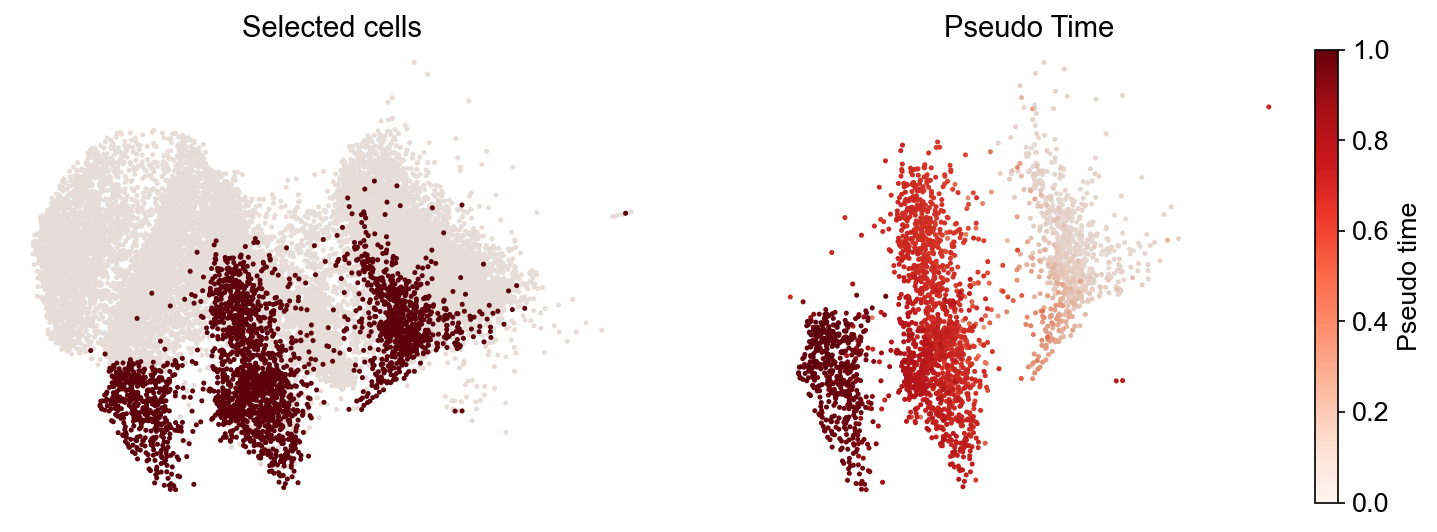

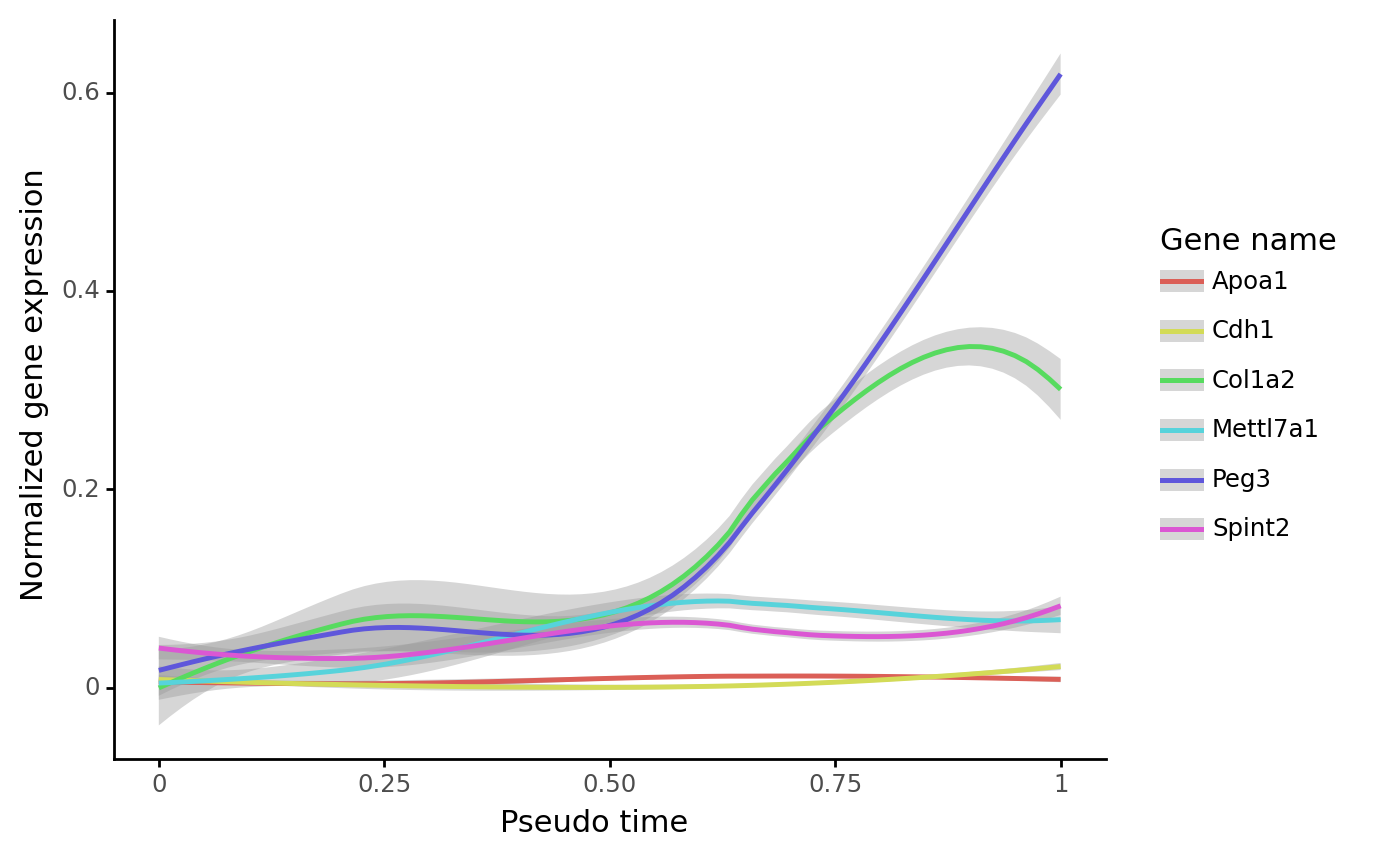

In [23]:
gene_name_list = ["Col1a2", "Apoa1", "Peg3", "Spint2", "Mettl7a1", "Cdh1"]
selected_fate = "Failed"
adata_selected = cs.pl.gene_expression_dynamics(
    adata,
    selected_fate,
    gene_name_list,
    traj_threshold=0.1,
    map_backwards=True,
    invert_PseudoTime=True,
    include_target_states=True,
    compute_new=True,
    fig_width=3.5,
    gene_exp_percentile=99,
    n_neighbors=8,
    plot_raw_data=False,
    point_size=2,
)

Then, the reprogramming trajectory

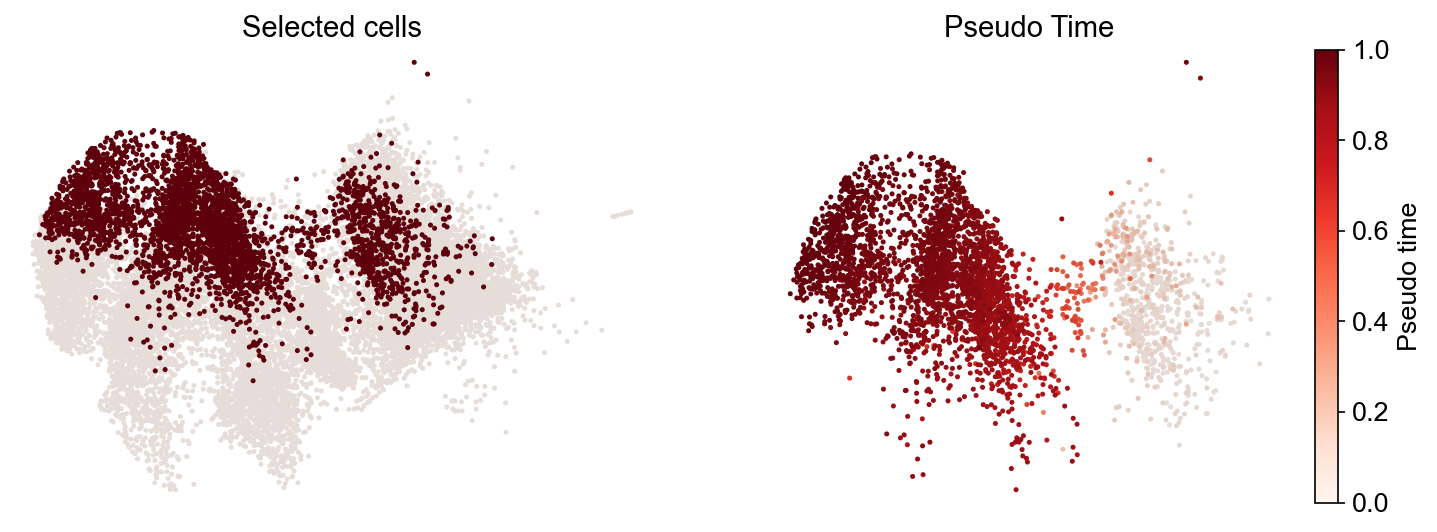

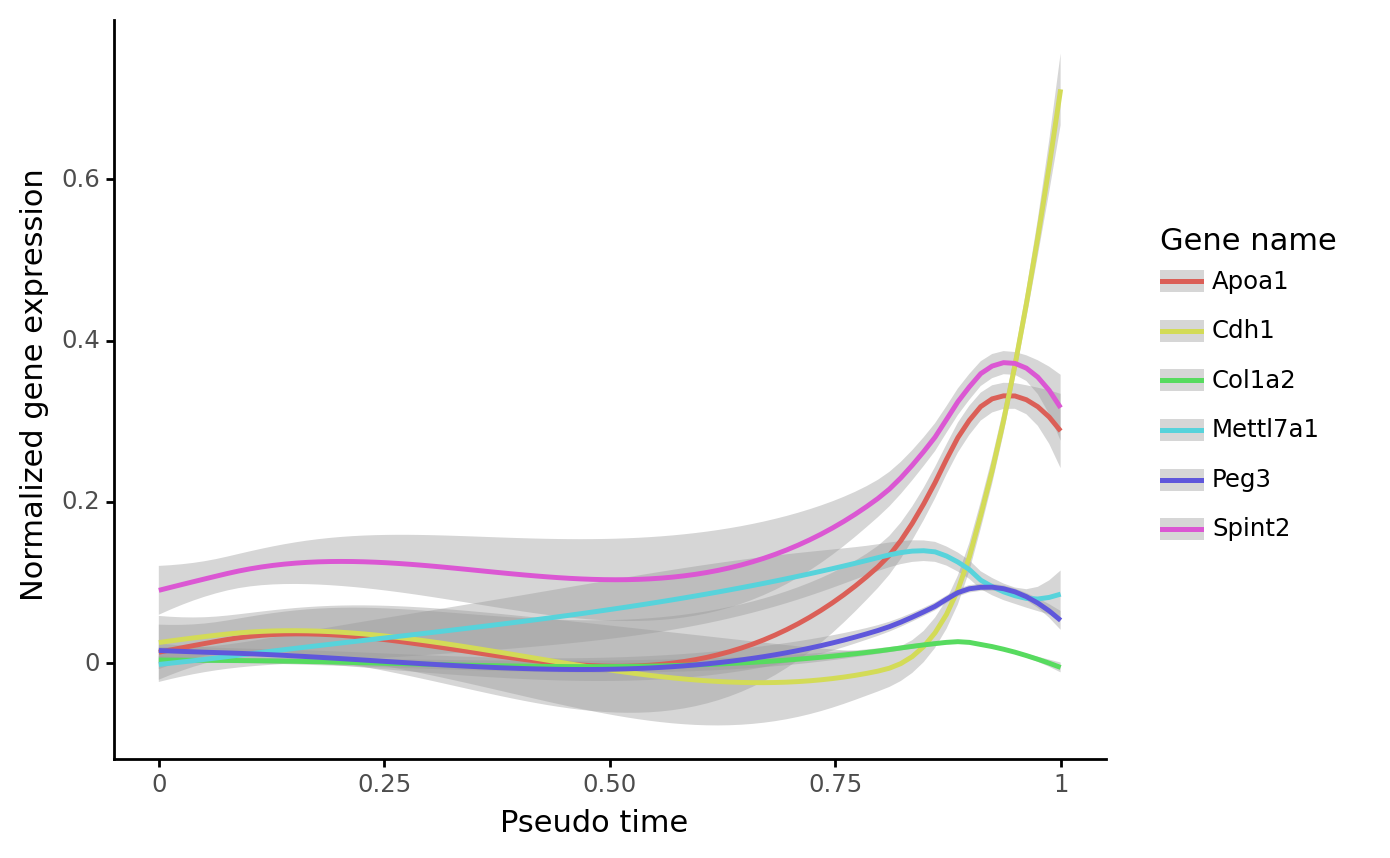

In [24]:
gene_name_list = ["Col1a2", "Apoa1", "Peg3", "Spint2", "Mettl7a1", "Cdh1"]
selected_fate = "Reprogrammed"
adata_selected = cs.pl.gene_expression_dynamics(
    adata,
    selected_fate,
    gene_name_list,
    traj_threshold=0.1,
    map_backwards=True,
    invert_PseudoTime=True,
    include_target_states=True,
    compute_new=True,
    fig_width=3.5,
    gene_exp_percentile=99,
    n_neighbors=8,
    plot_raw_data=False,
    point_size=2,
)

### Transition map from only clonal information

Use all clones (naive method)


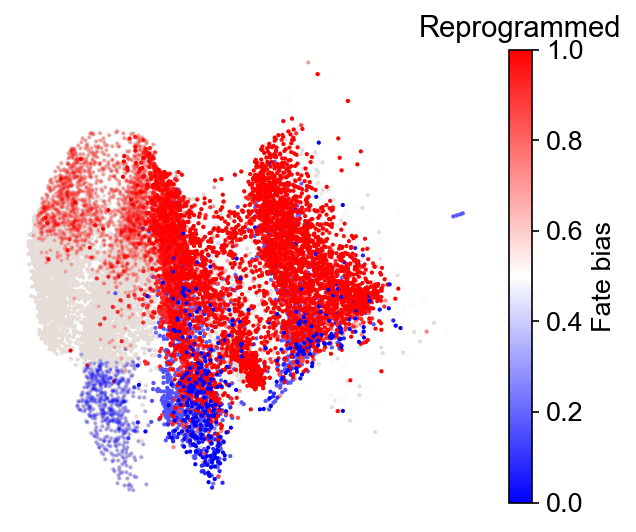

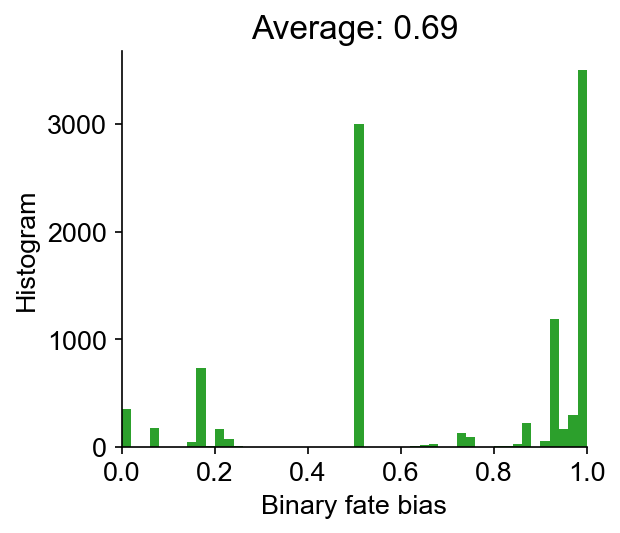

In [25]:
cs.tmap.infer_Tmap_from_clonal_info_alone(adata, method="naive")

cs.pl.fate_bias_from_binary_competition(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="clonal_transition_map",
    selected_time_points=[],
    plot_target_state=True,
    map_backwards=True,
    sum_fate_prob_thresh=0,
)

## Part II: Infer transition map using clones from the last time point

It takes 12 mins to compute for the first time (excluding the time for computing similarity matrix); and 5 mins later. 

In [26]:
initial_time_points = ["3", "4", "5", "6", "7"]
clonal_time_point = "8"
adata = cs.tmap.infer_Tmap_from_one_time_clones(
    adata_orig,
    initial_time_points,
    clonal_time_point,
    initialize_method="OT",
    OT_cost="SPD",
    smooth_array=[15, 10, 5],
    noise_threshold=0.2,
    use_full_Smatrix=True,
)

-------------------------------New Start--------------------------------------------------
Current time point: 3
-----------Pre-processing and sub-sampling cells------------
----------------
Step 1: Use OT method for initialization
Compute new shortest path distance matrix
--> Chosen mode is distances
Finishing computing shortest-path distance, used time 34.29471302032471
Compute new custon OT matrix
OT solver: duality_gap
Finishing computing optial transport map, used time 2.923114061355591
----------------
Step 2: Jointly optimize the transition map and the initial clonal states!
Joint optimization that consider possibility of clonal overlap: v2
--> original clone shape: (6654, 770)
--> After excluding zero-sized clones at t2: (6654, 694)
Sort clones by size (small to large)
Infer the number of initial cells to extract for each clone in advance
--> Inferring early clonal states: current clone id 0
--> Inferring early clonal states: current clone id 100
--> Inferring early clonal stat

--> Time elapsed:  0.6559262275695801
Compute similarity matrix: load existing data
--> Time elapsed:  0.18416786193847656
--> Time elapsed:  0.3762369155883789
--> Time elapsed:  0.09292793273925781
--> Time elapsed:  0.40812015533447266
Current iteration: 0
Use smooth_round=15
Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
Start to smooth the refined clonal map
Phase I: time elapsed --  9.260096073150635
Phase II: time elapsed --  9.917959928512573
Current iteration: 1
Use smooth_round=10
Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
Start to smooth the refined clonal map
Phase I: time elapsed --  1.9935970306396484
Phase II: time elapsed --  2.618314743041992
Current iteration: 2
Use smooth_round=5
Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
Start to smooth the refined clonal map
Phase I: time elapsed --  2.7583789825439453
Phase II: time elapsed --  3.5996220111846924
Final round of Smooth (to expa

In [27]:
cs.hf.check_available_choices(adata)

Available transition maps: ['transition_map', 'OT_transition_map']
Availabel clusters: ['2', '19', '4', '9', '21', '22', 'Reprogrammed', '8', '20', '15', '18', '7', 'Failed', '3', '16', '0', '13', '12', '5', '11', '10']
Availabel time points: ['3', '4', '6', '5', '7', '8']
Clonal time points: ['3', '4', '6', '5', '7', '8']


### Fate map

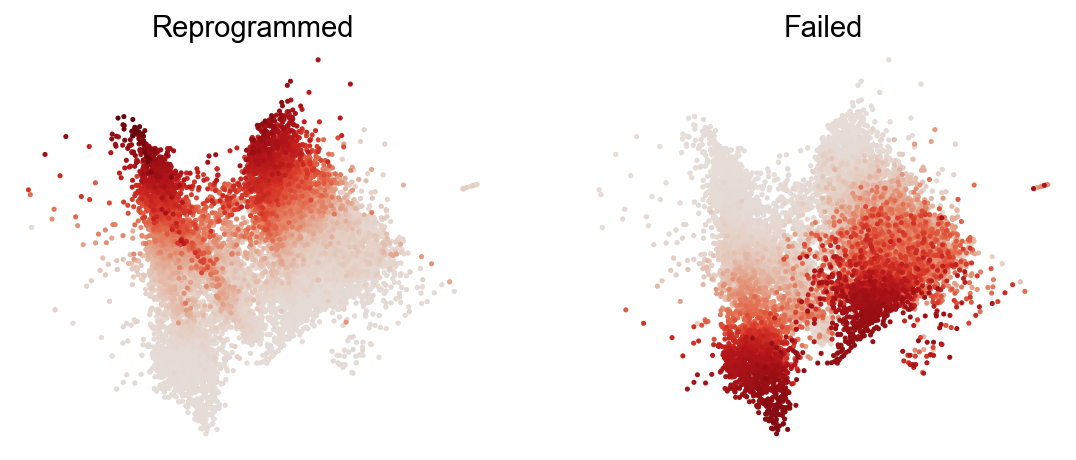

In [28]:
cs.pl.fate_map(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="transition_map",
    map_backwards=True,
    plot_target_state=False,
    color_bar=False,
    background=False,
    auto_color_scale=False,
    horizontal=True,
)

### Relative fate bias

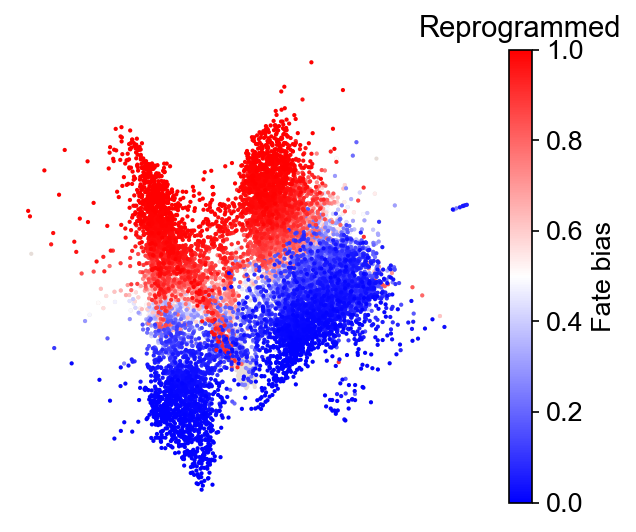

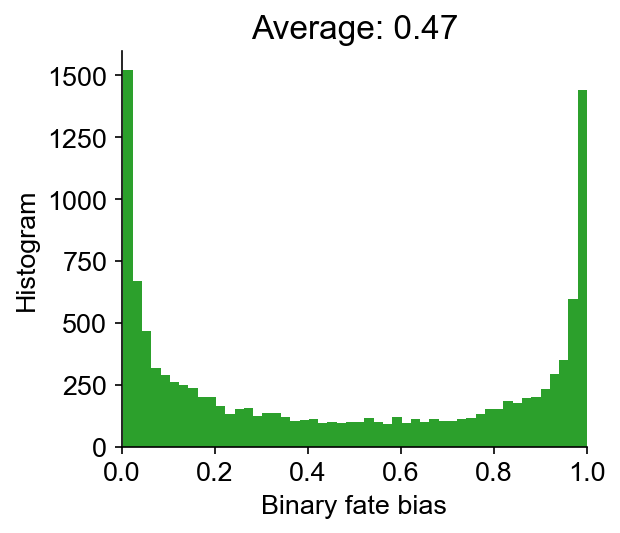

In [29]:
cs.pl.fate_bias_from_binary_competition(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="transition_map",
    selected_time_points=[],
    plot_target_state=False,
    map_backwards=True,
    sum_fate_prob_thresh=0.1,
)

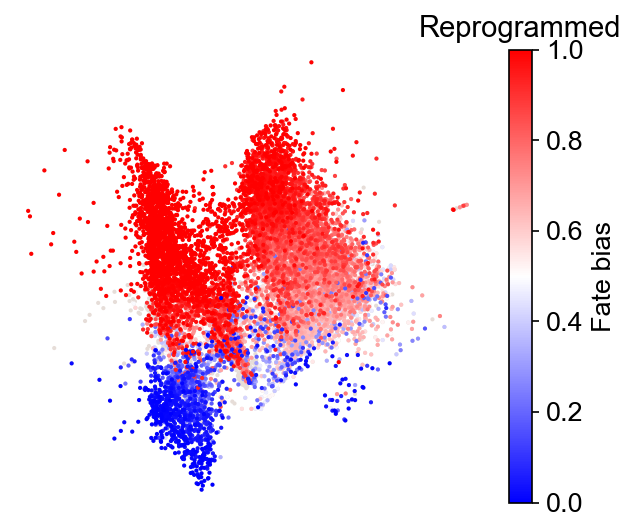

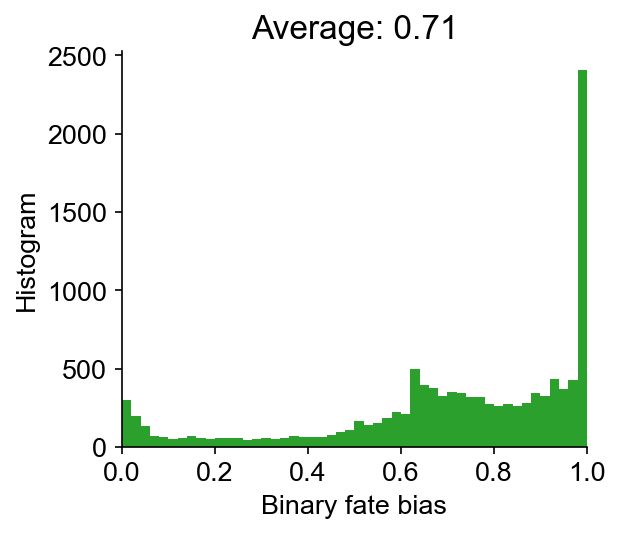

In [30]:
cs.pl.fate_bias_from_binary_competition(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="OT_transition_map",
    selected_time_points=[],
    plot_target_state=False,
    map_backwards=True,
    sum_fate_prob_thresh=0.1,
)

### Dynamic trajectory inference

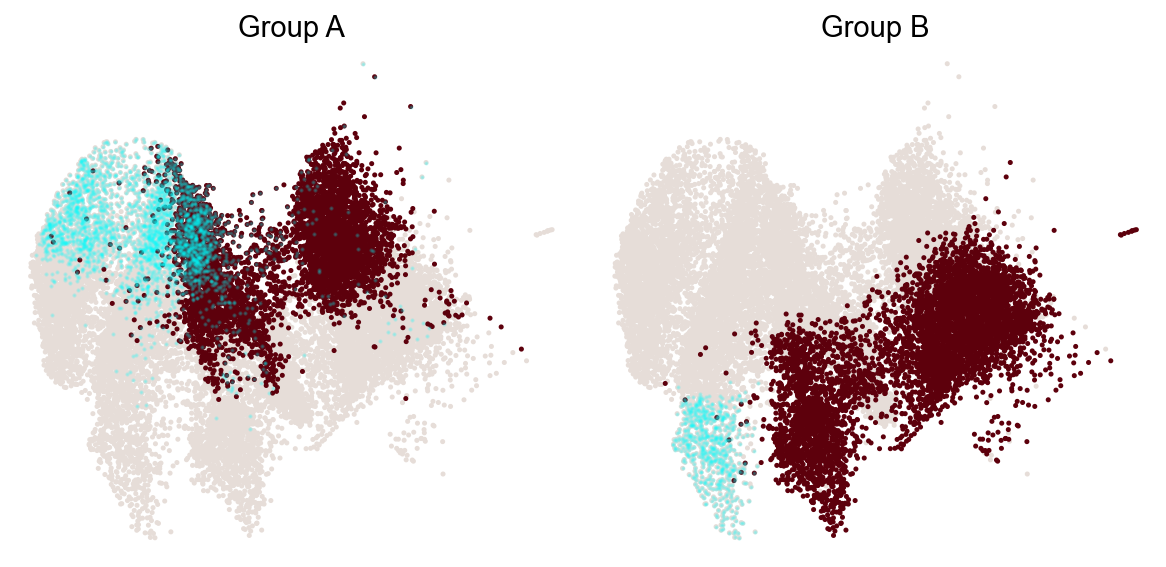

In [31]:
cs.pl.dynamic_trajectory_from_competition_bias(
    adata,
    selected_fates=["Reprogrammed", "Failed"],
    used_map_name="transition_map",
    map_backwards=True,
    selected_time_points=[],
    bias_threshold=0,
    sum_fate_prob_thresh=0.2,
    avoid_target_states=False,
)

### Gene trend along the dynamic trajectory

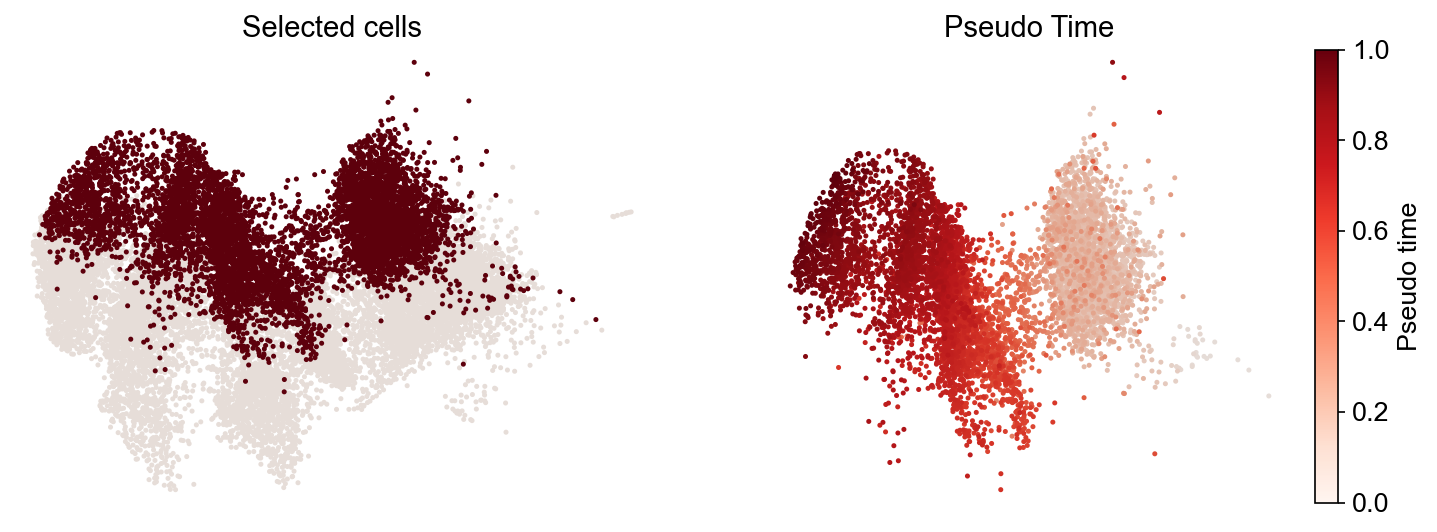

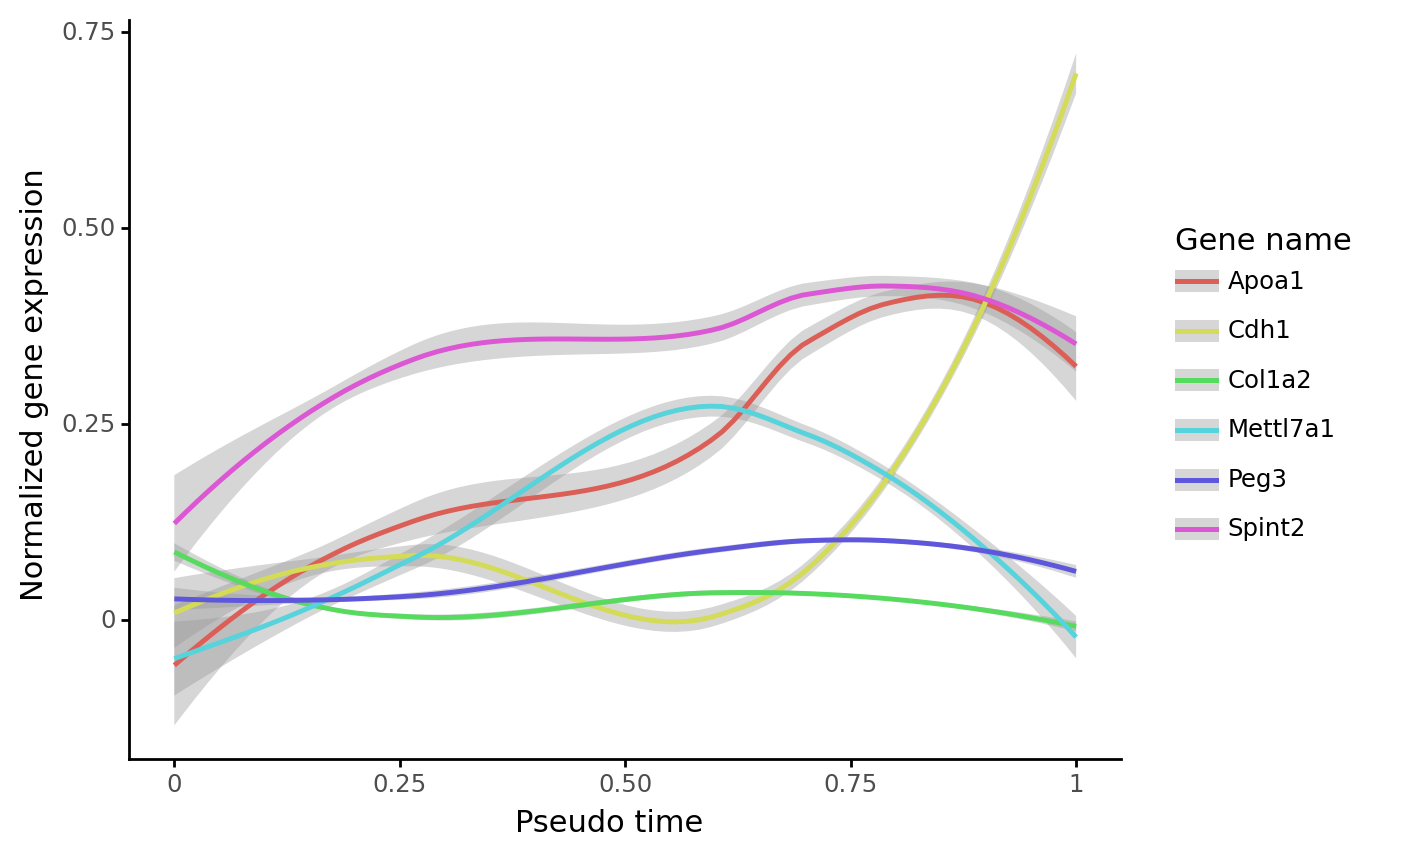

In [32]:
gene_name_list = ["Col1a2", "Apoa1", "Peg3", "Spint2", "Mettl7a1", "Cdh1"]
selected_fate = "Reprogrammed"
adata_selected = cs.pl.gene_expression_dynamics(
    adata,
    selected_fate,
    gene_name_list,
    traj_threshold=0.2,
    map_backwards=True,
    invert_PseudoTime=True,
    include_target_states=True,
)